In [202]:
from numpy import sin, exp, linspace, log10
import matplotlib.pyplot as plt

from scipy.optimize import minimize_scalar, newton, root, minimize

from pulp import *

from sympy.solvers import solve
from sympy import Symbol

### Minimum and root finding

In [51]:
def function_1(x):
    return sin(x)*exp(-0.1*(x-0.6)**2)

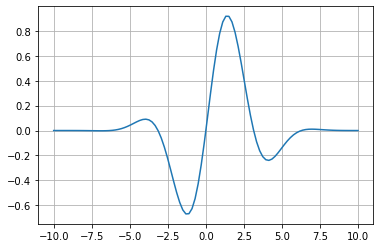

In [52]:
x = linspace(-10, 10, 100)
y = function_1(x)

plt.plot(x,y)
plt.grid()
plt.show()

Finding the global minimum

In [53]:
minimize_scalar(function_1)

     fun: -0.6743051024666711
    nfev: 15
     nit: 10
 success: True
       x: -1.2214484245210282

In [24]:
minimize_scalar(function_1, bounds = (2.5, 5), method = 'bounded')

     fun: -0.24037563941326257
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 4.101466070862699

Finding roots - hints from looking at the chart

In [37]:
newton(function_1, -5), newton(function_1, -2), newton(function_1, 0), newton(function_1, 3), newton(function_1, 6)

(-6.283185307179547,
 -3.1415926535897936,
 0.0,
 3.1415926535897922,
 6.283185307179586)

In [44]:
root(function_1, (-5, 5))

    fjac: array([[-0.80224272,  0.596998  ],
       [-0.596998  , -0.80224272]])
     fun: array([5.43524933e-12, 1.98924722e-12])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-6.56367305e-11, -1.00257815e-10])
       r: array([-0.00359888, -0.02180412, -0.1010398 ])
  status: 1
 success: True
       x: array([-6.28318531,  6.28318531])

### Introducing constraints

Need to put all contstaints in <(=) 0 forms

In [133]:
def constraint_1(x):
    return 0.5 - log10(x**2 + 2)

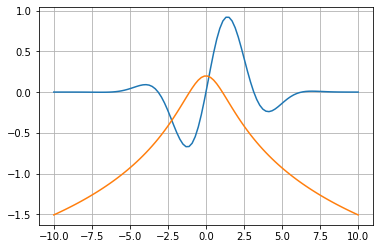

In [134]:
x = linspace(-10, 10, 100)
y = function_1(x)
c1 = constraint_1(x)

plt.plot(x,y)
plt.plot(x, c1)
plt.grid()
plt.show()

In [135]:
con1 = {'type':'ineq', 'fun' : constraint_1}

cons = (con1)

In [136]:
minimize(function_1, x0 = 0, method = 'SLSQP', constraints = cons, options={'maxiter' : 1000})

     fun: -0.664824182057684
     jac: array([0.13379647])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-1.07809039])

### LP problem #1 - solving with PuLP

![](https://miro.medium.com/max/860/1*bgY2sjQtHd9_R7cgJbH_cw.png)

In [143]:
lp_model = LpProblem('Maximize sales', sense = LpMaximize)

x = LpVariable("x", 0, 200)
y = LpVariable("y", 0, 500)
z = LpVariable("z", 0, 500)

lp_model += x + y + z <= 1000

lp_model += 0.0544*x + 0.107*y + 0.00033*z + 4.6251

In [152]:
lp_model.variables

<bound method LpProblem.variables of Maximize_sales:
MAXIMIZE
0.0544*x + 0.107*y + 0.00033*z + 4.6251
SUBJECT TO
_C1: x + y + z <= 1000

VARIABLES
x <= 200 Continuous
y <= 500 Continuous
z <= 500 Continuous
>

In [162]:
lp_model.solve()

print('LP model status:', LpStatus[lp_model.status])

LP model status: Optimal


In [161]:
for variable in lp_model.variables():
    print('optimal value for', variable, 'is:', variable.varValue)

print('\nObjective function:', lp_model.objective)
print('Optimal value:', lp_model.objective.value())

optimal value for x is: 200.0
optimal value for y is: 500.0
optimal value for z is: 300.0

Objective function: 0.0544*x + 0.107*y + 0.00033*z + 4.6251
Optimal value: 69.1041


### LP problem #2

![](https://files.realpython.com/media/lp-py-eq-2.2984ea2b89df.png)

In [233]:
lp_model = LpProblem('maximize function z', LpMaximize)

x = LpVariable('x', 0)
y = LpVariable('y', 0)

lp_model += 2*x + y <= 20
lp_model += -4*x + 5*y <= 10
lp_model += -x + 2*y >= -2
lp_model += -x + 5*y == 15

lp_model += x + 2*y

In [234]:
lp_model.variables

<bound method LpProblem.variables of maximize_function_z:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: 2 x + y <= 20

_C2: - 4 x + 5 y <= 10

_C3: - x + 2 y >= -2

_C4: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous
>

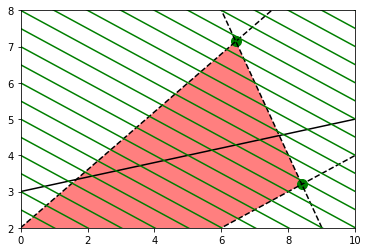

In [235]:
def f1(x):
    return -2*x + 20
def f2(x):
    return 4/5*x + 2
def f3(x):
    return 1/2*x - 1

def obj(x, z):
    return -1/2*x + z/2

def eq(x):
    return 1/5*x + 3

x = Symbol('x')
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))

y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)

plt.plot(x1,f1(x1),'go',markersize=10)
plt.plot(x2,f1(x2),'go',markersize=10)
plt.plot(x3,f2(x3),'go',markersize=10)

plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1],'red',alpha=0.5)

xr = linspace(0, 10)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)
equ = eq(xr)

plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
plt.plot(xr,y3r,'k--')

plt.plot(xr, equ, 'k-')

for z in range(5, 30):
    plt.plot(xr, obj(xr, z), 'g-')

plt.xlim(0, 10)
plt.ylim(2, 8)

plt.show()

In [236]:
lp_model.solve()

print('LP model status:', LpStatus[lp_model.status])

LP model status: Optimal


In [237]:
for variable in lp_model.variables():
    print('optimal value for', variable, 'is:', variable.varValue)

print('\nObjective function:', lp_model.objective)
print('Optimal value:', lp_model.objective.value())

optimal value for x is: 7.7272727
optimal value for y is: 4.5454545

Objective function: x + 2*y
Optimal value: 16.8181817


### LP problem #3

![](https://files.realpython.com/media/lp-py-eq-4.0178c4cfe357.png)

In [174]:
lp_model = LpProblem('maximize profit', LpMaximize)

x1 = LpVariable('x1', 0)
x2 = LpVariable('x2', 0)
x3 = LpVariable('x3', 0)
x4 = LpVariable('x4', 0)

lp_model += x1 + x2 + x3 + x4 <= 50, "manpower"
lp_model += 3*x1 + 2*x2 + x3 <= 100, "material A"
lp_model += x2 + 2*x3 + 3*x4 <= 90, "material B"

lp_model += 20*x1 + 12*x2 + 40*x3 + 25*x4

In [175]:
lp_model.variables

<bound method LpProblem.variables of maximize_profit:
MAXIMIZE
20*x1 + 12*x2 + 40*x3 + 25*x4 + 0
SUBJECT TO
manpower: x1 + x2 + x3 + x4 <= 50

material_A: 3 x1 + 2 x2 + x3 <= 100

material_B: x2 + 2 x3 + 3 x4 <= 90

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
>

In [176]:
lp_model.solve()

print('LP model status:', LpStatus[lp_model.status])

LP model status: Optimal


In [177]:
for variable in lp_model.variables():
    print('optimal value for', variable, 'is:', variable.varValue)

print('\nObjective function:', lp_model.objective)
print('Optimal value:', lp_model.objective.value())

optimal value for x1 is: 5.0
optimal value for x2 is: 0.0
optimal value for x3 is: 45.0
optimal value for x4 is: 0.0

Objective function: 20*x1 + 12*x2 + 40*x3 + 25*x4
Optimal value: 1900.0


### LP problem #4

In [200]:
lp_model = LpProblem('maximize equation', LpMaximize)

a = LpVariable('a', 0)
b = LpVariable('b', 0)
c = LpVariable('c', 0)

lp_model += a + b >= 11
lp_model += a - b <= 5
lp_model += c - a - b == 0 
lp_model += 7*a + 12*b >= 35

lp_model += 4*a + 5*b + 6*c

lp_model.variables

<bound method LpProblem.variables of maximize_equation:
MAXIMIZE
4*a + 5*b + 6*c + 0
SUBJECT TO
_C1: a + b >= 11

_C2: a - b <= 5

_C3: - a - b + c = 0

_C4: 7 a + 12 b >= 35

VARIABLES
a Continuous
b Continuous
c Continuous
>

In [201]:
lp_model.solve()

print('LP model status:', LpStatus[lp_model.status])

for variable in lp_model.variables():
    print('optimal value for', variable, 'is:', variable.varValue)

print('\nObjective function:', lp_model.objective)
print('Optimal value:', lp_model.objective.value())

LP model status: Unbounded
optimal value for a is: 0.0
optimal value for b is: 11.0
optimal value for c is: 11.0

Objective function: 4*a + 5*b + 6*c
Optimal value: 121.0


### Try diophantines with simple for loop

In [244]:
from sympy.solvers.diophantine import diophantine
from sympy import var

In [260]:
x, y = var('x y')
diophantine(2*x**2-3*x*y+8*y**2-2*x+10*y-10)

{(-1, -2)}

In [272]:
def dio_fun(x, y):
    return 2*x**2-3*x*y+8*y**2-2*x+10*y-10

for x in range(-100, 100):
    for y in range(-100, 100):
        if dio_fun(x, y) == 0:
            print('solution for x is', x, ', for y is', y)

solution for x is -1 , for y is -2


In [278]:
def ramanujan_nagell(x, n):
    return 2**n - 7 - x**2


for x in range(-200, 200):
    for n in range(-100, 100):
        if ramanujan_nagell(x, n) == 0:
            print('solution for x is', x, ', for n is', n)

solution for x is -181 , for n is 15
solution for x is -11 , for n is 7
solution for x is -5 , for n is 5
solution for x is -3 , for n is 4
solution for x is -1 , for n is 3
solution for x is 1 , for n is 3
solution for x is 3 , for n is 4
solution for x is 5 , for n is 5
solution for x is 11 , for n is 7
solution for x is 181 , for n is 15


### Using LinReg coeff within an optimization model

1. Apply a linear regression to get coefficients
2. Set an LP model to solve
3. Use PuLP to find optimal Xs for objective function

In [348]:
import pandas as pd
import seaborn as sns
from numpy import transpose, sqrt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [304]:
X = pd.DataFrame(fetch_california_housing().data)
y = pd.DataFrame(fetch_california_housing().target)

X.shape, y.shape

((20640, 8), (20640, 1))

In [313]:
X.columns = fetch_california_housing().feature_names
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [317]:
y.columns = ['Value_USD']
y['Value_USD'] = y['Value_USD'].apply(lambda x: x * 100000)
y.head()

Value_USD
0   452600.0
1   358500.0
2   352100.0
3   341300.0
4   342200.0

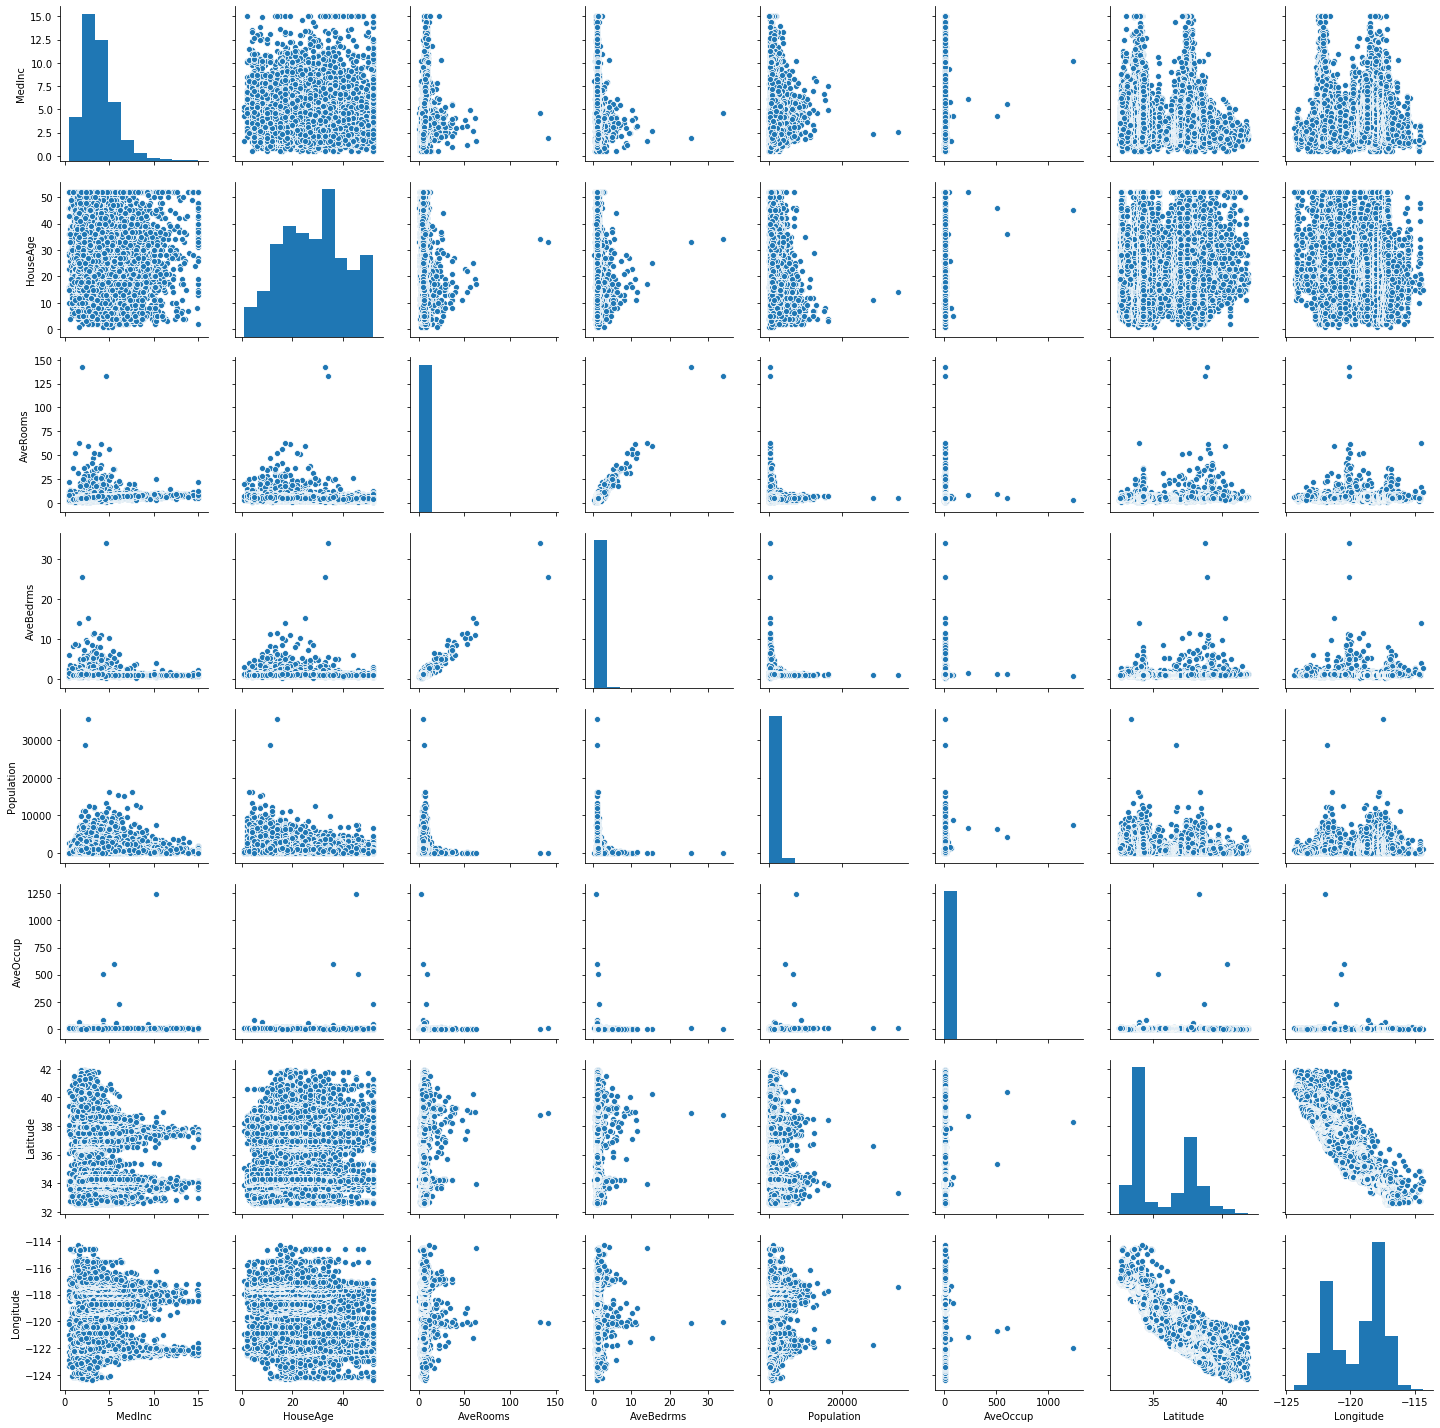

In [330]:
sns.pairplot(X)

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2020)

#### With sklearn

In [347]:
Regressor = LinearRegression()
Regressor.fit(X_train, y_train)

pd.concat([pd.DataFrame(X.columns, columns = ['Feature']),pd.DataFrame(transpose(Regressor.coef_), columns = ['Coefficient'])], axis = 1)

Feature   Coefficient
0      MedInc  44279.972695
1    HouseAge    960.921100
2    AveRooms -11548.281555
3   AveBedrms  67912.760466
4  Population     -0.592750
5    AveOccup   -339.095012
6    Latitude -41787.427559
7   Longitude -43046.510928

In [369]:
y_pred = Regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print('r2 is ', r2, 'rmse is', rmse)

r2 is  0.5992616923098482 rmse is 73594.67646364376


#### With statsmodels API

In [360]:
X = sm.add_constant(X_train)
results = sm.OLS(y_train, X).fit()

In [361]:
results.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

In [362]:
results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [368]:
X_tst = sm.add_constant(X_test)
test_predictions = results.predict(X_tst)

r2 = r2_score(y_test, test_predictions)
rmse = sqrt(mean_squared_error(y_test, test_predictions))

print('r2 is ', r2, 'rmse is', rmse)

r2 is  0.5992616923098499 rmse is 73594.6764636436


#### Extract coefficients for LP model

In [387]:
coefficients = Regressor.coef_.tolist()
intercept = Regressor.intercept_.tolist()[0]

#### Set PuLP model and solve

Goal: Looking for a house for $250k
Objective function: regression equation to predict property value
Constraints: listed in LP model

In [444]:
lp_model = LpProblem('Maximize property value', LpMaximize)

a = LpVariable('MedInc', 5, 15)
b = LpVariable('HouseAge', 0, 30)
c = LpVariable('AveRooms', 2, 6)
d = LpVariable('AveBedrooms', 1, 4)
e = LpVariable('Pop', 250, 750)
f = LpVariable('Ave_Occup', 1, 7)
g = LpVariable('Lat')
h = LpVariable('Long')

lp_model += g == 37.8
lp_model += h == -122.3

lp_model += coefficients[0][0]*a + coefficients[0][1]*b + coefficients[0][2]*c + coefficients[0][3]*d + coefficients[0][4]*e + coefficients[0][5]*f + coefficients[0][6]*g + coefficients[0][7]*h + intercept == 250000

lp_model += coefficients[0][0]*a + coefficients[0][1]*b + coefficients[0][2]*c + coefficients[0][3]*d + coefficients[0][4]*e + coefficients[0][5]*f + coefficients[0][6]*g + coefficients[0][7]*h + intercept

lp_model.variables

<bound method LpProblem.variables of Maximize_property_value:
MAXIMIZE
67912.7604664376*AveBedrooms + -11548.281554772531*AveRooms + -339.0950118486186*Ave_Occup + 960.9210996842049*HouseAge + -41787.427559456795*Lat + -43046.510928295545*Long + 44279.97269526265*MedInc + -0.5927504165487244*Pop + -3660214.569273587
SUBJECT TO
_C1: Lat = 37.8

_C2: Long = -122.3

_C3: 67912.7604664 AveBedrooms - 11548.2815548 AveRooms
 - 339.095011849 Ave_Occup + 960.921099684 HouseAge - 41787.4275595 Lat
 - 43046.5109283 Long + 44279.9726953 MedInc - 0.592750416549 Pop
 = 3910214.56927

VARIABLES
1 <= AveBedrooms <= 4 Continuous
2 <= AveRooms <= 6 Continuous
1 <= Ave_Occup <= 7 Continuous
HouseAge <= 30 Continuous
Lat free Continuous
Long free Continuous
5 <= MedInc <= 15 Continuous
250 <= Pop <= 750 Continuous
>

In [445]:
lp_model.solve()

print('LP model status:', LpStatus[lp_model.status])

for variable in lp_model.variables():
    print('optimal value for', variable, 'is:', variable.varValue)

print('\nObjective function:', lp_model.objective)
print('Optimal value:', lp_model.objective.value())

LP model status: Optimal
optimal value for AveBedrooms is: 1.0
optimal value for AveRooms is: 6.0
optimal value for Ave_Occup is: 7.0
optimal value for HouseAge is: 0.0
optimal value for Lat is: 37.8
optimal value for Long is: -122.3
optimal value for MedInc is: 5.1736668
optimal value for Pop is: 250.0

Objective function: 67912.7604664376*AveBedrooms - 11548.281554772531*AveRooms - 339.0950118486186*Ave_Occup + 960.9210996842049*HouseAge - 41787.427559456795*Lat - 43046.510928295545*Long + 44279.97269526265*MedInc - 0.5927504165487244*Pop - 3660214.569273587
Optimal value: 249999.99859860353


Based on the regression and the LP constraints, to find a house for USD250k that matches the given constraints, we have to find a 6-room, 1-bedroom, newly built house, in a neighborhood where the median income is 5.17 (?*10k$) and the population is 250k